Visual Mood Recognition: A Multi-Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset1 : https://www.kaggle.com/datasets/msambare/fer2013

Dataset2: https://www.kaggle.com/datasets/davilsena/ckdataset/data

Image Loading & PreProcessing

->PreProcessing steps:

Resize

Gray scale

Normalizing

Label Encoding

Split & Train Data

For Dataset1

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the directory containing the dataset
dataset_dir = '/content/drive/MyDrive/MV/Img_Dataset'

# Define the emotions (class labels)
emotions = ['disgust','happy','sad','surprise']

# Preprocessing function to read images, resize them, and normalize pixel values
def preprocess_image(file_path, target_size):
    #print(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    image = cv2.resize(image, target_size)  # Resize image
    image = image / 255.0  # Normalize pixel values
    return image

# Load images and labels
images = []
labels = []

for emotion_label, emotion in enumerate(emotions):
    emotion_dir = os.path.join(dataset_dir, emotion)
    for image_name in os.listdir(emotion_dir):
        image_path = os.path.join(emotion_dir, image_name)
        preprocessed_image = preprocess_image(image_path, (224, 224))  # Resize for ResNet50
        images.append(preprocessed_image)
        labels.append(emotion)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels, num_classes=len(emotions))

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
import random
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array

# Convert grayscale images to RGB format
train_images_rgb = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images_rgb = np.repeat(test_images[..., np.newaxis], 3, -1)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.3616 - loss: 1.9422 - val_accuracy: 0.3438 - val_loss: 1.2654
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.5329 - loss: 1.2013 - val_accuracy: 0.6250 - val_loss: 0.9324
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.7006 - loss: 0.7384 - val_accuracy: 0.6250 - val_loss: 0.8890
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.8456 - loss: 0.4551 - val_accuracy: 0.7500 - val_loss: 0.7049
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.8845 - loss: 0.3508 - val_accuracy: 0.6562 - val_loss: 0.7004
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.9224 - loss: 0.2556 - val_accuracy: 0.6562 - val_loss: 0.6856
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 67s 8s/step - accuracy: 0.9601 - loss: 0.1594 - val_accuracy: 0.6562 - val_loss: 0.7963
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 85s 8s/step - accuracy: 0.9616 - loss: 0.1449 - val_accuracy: 0.7812 - val_loss: 0.7270
Epoch 9/

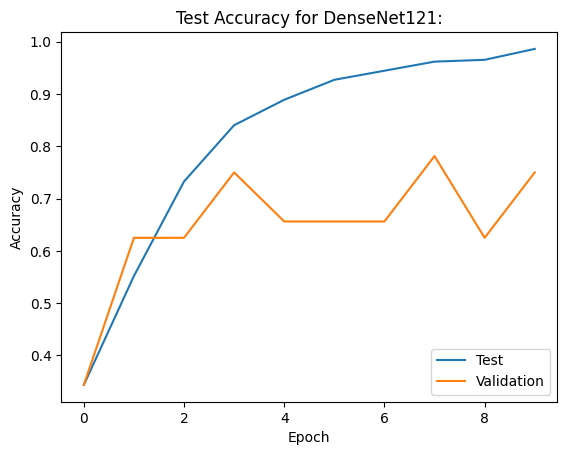

In [ ]:
from tensorflow.keras.applications import DenseNet121

# Assuming 'emotions' is the number of classes in your classification task
num_classes = len(emotions)

# Load pre-trained DenseNet model (include_top=False for feature extraction)
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained DenseNet model
for layer in densenet_model.layers:
    layer.trainable = False

# Create a new model with the DenseNet base and additional layers for classification
model = Sequential([
    densenet_model,
    Flatten(),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjusted learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history1=model.fit(train_images_rgb, train_labels, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels)
print('Test accuracy:', test_acc * 100)

# Visualize training accuracy
plt.title("Test Accuracy for DenseNet121:")
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step
Report for DenseNet121 model:
               precision    recall  f1-score   support

     disgust       0.65      0.65      0.65        26
       happy       0.43      0.56      0.49        18
         sad       0.47      0.39      0.42        18
    surprise       0.69      0.61      0.65        18

    accuracy                           0.56        80
   macro avg       0.56      0.55      0.55        80
weighted avg       0.57      0.56      0.56        80

Multi-Classification of mood through DenseNet121 Model:



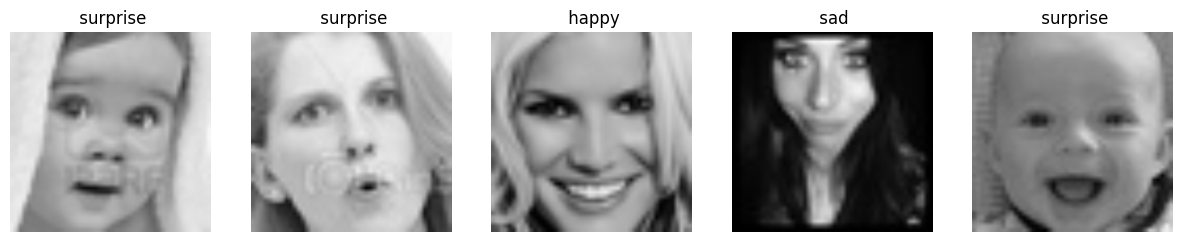

In [ ]:
predicted_labels1 = model.predict(test_images_rgb)
y_pred1 = [emotions[np.argmax(label)] for label in predicted_labels1]
y_true = [emotions[np.argmax(label)] for label in test_labels]
# Compute classification report
report1 = classification_report(y_true, y_pred1)

# Print classification report
print("Report for DenseNet121 model:\n",report1)
print("Multi-Classification of mood through DenseNet121 Model:\n")
# Select random indices for sample images
sample_indices = random.sample(range(len(test_images_rgb)), 5)
#, cmap='Accent'
# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images_rgb[idx])
    plt.title(f' {y_pred1[idx]}')
    plt.axis('off')
plt.show()

In [ ]:
print("For Densenet121 model\n:",report1)

For Densenet121 model
:               precision    recall  f1-score   support

     disgust       0.65      0.65      0.65        26
       happy       0.43      0.56      0.49        18
         sad       0.47      0.39      0.42        18
    surprise       0.69      0.61      0.65        18

    accuracy                           0.56        80
   macro avg       0.56      0.55      0.55        80
weighted avg       0.57      0.56      0.56        80



For Dataset2

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the directory containing the dataset
dataset_dir = '/content/drive/MyDrive/MV/MV_Data'

# Define the emotions (class labels)
emotions = ['disgust','happy','sad','surprise']

# Preprocessing function to read images, resize them, and normalize pixel values
def preprocess_image(file_path, target_size):
    #print(file_path)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    image = cv2.resize(image, target_size)  # Resize image
    image = image / 255.0  # Normalize pixel values
    return image

# Load images and labels
images = []
labels = []

for emotion_label, emotion in enumerate(emotions):
    emotion_dir = os.path.join(dataset_dir, emotion)
    for image_name in os.listdir(emotion_dir):
        image_path = os.path.join(emotion_dir, image_name)
        preprocessed_image = preprocess_image(image_path, (224, 224))  # Resize for ResNet50
        images.append(preprocessed_image)
        labels.append(emotion)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels, num_classes=len(emotions))

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

DenseNet121 Model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
import random
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array

# Convert grayscale images to RGB format
train_images_rgb = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images_rgb = np.repeat(test_images[..., np.newaxis], 3, -1)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 141s 10s/step - accuracy: 0.4619 - loss: 1.6230 - val_accuracy: 0.9500 - val_loss: 0.2934
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 150s 11s/step - accuracy: 0.8593 - loss: 0.3906 - val_accuracy: 0.9750 - val_loss: 0.1522
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 101s 7s/step - accuracy: 0.8943 - loss: 0.2579 - val_accuracy: 1.0000 - val_loss: 0.0249
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 84s 7s/step - accuracy: 0.9616 - loss: 0.0980 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 84s 7s/step - accuracy: 0.9734 - loss: 0.0793 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.9991 - loss: 0.0287 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 161s 9s/step - accuracy: 0.9973 - loss: 0.0218 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 124s 7s/step - accurac

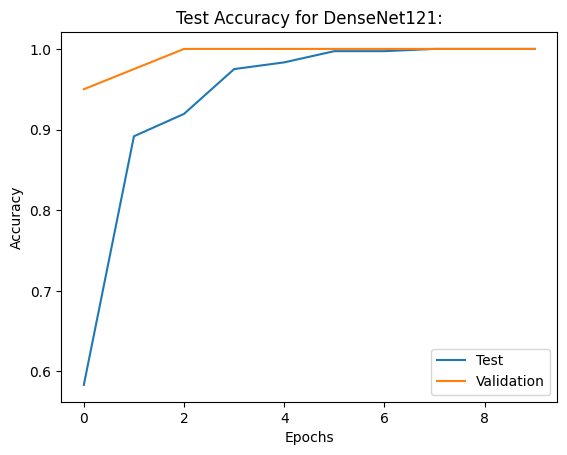

In [ ]:
from tensorflow.keras.applications import DenseNet121

# Assuming 'emotions' is the number of classes in your classification task
num_classes = len(emotions)

# Load pre-trained DenseNet model (include_top=False for feature extraction)
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained DenseNet model
for layer in densenet_model.layers:
    layer.trainable = False

# Create a new model with the DenseNet base and additional layers for classification
model = Sequential([
    densenet_model,
    Flatten(),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Adjusted learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history4=model.fit(train_images_rgb, train_labels, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels)
print('Test accuracy:', test_acc * 100)

# Visualize training accuracy
plt.title("Test Accuracy for DenseNet121:")
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step
Report for DenseNet121 model:
               precision    recall  f1-score   support

     disgust       1.00      1.00      1.00        37
       happy       0.97      1.00      0.99        34
         sad       1.00      0.95      0.97        19
    surprise       1.00      1.00      1.00        11

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

Multi-Classification of mood through DenseNet121 Model:



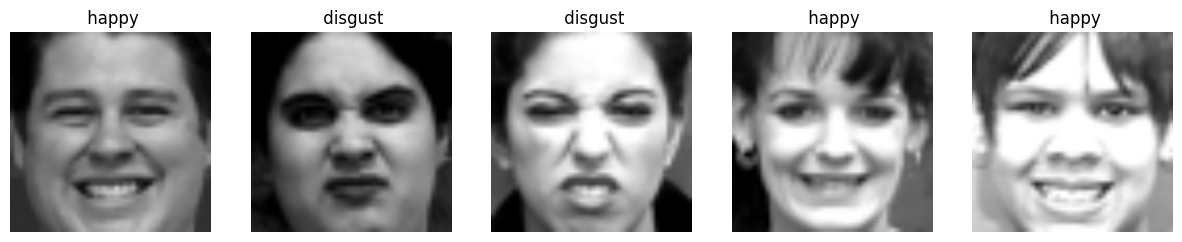

In [ ]:
predicted_labels4 = model.predict(test_images_rgb)
y_pred4 = [emotions[np.argmax(label)] for label in predicted_labels4]
y_true = [emotions[np.argmax(label)] for label in test_labels]
# Compute classification report
report4 = classification_report(y_true, y_pred4)

# Print classification report
print("Report for DenseNet121 model:\n",report4)
print("Multi-Classification of mood through DenseNet121 Model:\n")
# Select random indices for sample images
sample_indices = random.sample(range(len(test_images_rgb)), 5)
#, cmap='Accent'
# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images_rgb[idx])
    plt.title(f' {y_pred4[idx]}')
    plt.axis('off')
plt.show()

In [ ]:
print("For Densenet121 model\n:",report4)

For Densenet121 model
:               precision    recall  f1-score   support

     disgust       1.00      1.00      1.00        37
       happy       0.97      1.00      0.99        34
         sad       1.00      0.95      0.97        19
    surprise       1.00      1.00      1.00        11

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

